# Data Science - Project
### Nadav Aviv 311339287
### Paz Asraf 311319180
### Tzach Hadar 312480767

### First Excercise
##### We were asked to add the following columns to the given hotels CSV:
1. DayDiff - How many days there are between the Checkin Date and the Snapshot Date
2. WeekDay - Which day of the week is the Checkin Date
3. DiscountDiff - What is the value of the discount in USD
4. DiscountPerc - What is the value of the discount in percentage

# Let's Start

#### Let's take a look at our data:

In [42]:
%matplotlib inline 
import numpy as np
import pandas as pd

hotelsDf = pd.read_csv("hotels_data.csv")
hotelsDf.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4


#### As we can see, we have the following columns in our data:
1. Snapshot ID - the identifier of the giver snapshot
2. Snapshot Date - when was the snapshot taken
3. Checkin Date - when is the Checkin Date
4. Days - how long will you be staying at the hotel
5. Original Price - what is the original cost of the stay
6. Discount Price - What is the post-discount cost of the stay
7. Discount Code - this will be our class later
8. Available Rooms - how many rooms are vacant
9. Hotel Name - The Name of the Hotel
10. Hotel Stars - how many stars does the hotel have.

##### Column Adding

In [43]:
# Changes columns type into date for later dates calculations
hotelsDf['Checkin Date'] = pd.to_datetime(hotelsDf['Checkin Date'])
hotelsDf['Snapshot Date'] = pd.to_datetime(hotelsDf['Snapshot Date'])

# Adds 'DayDiff', 'WeekDay', 'DiscountDiff', 'DiscountPerc' columns
hotelsDf['DayDiff'] = hotelsDf['Checkin Date'] - hotelsDf['Snapshot Date']
hotelsDf['WeekDay'] = hotelsDf['Checkin Date'].dt.weekday_name
hotelsDf['DiscountDiff'] = hotelsDf['Original Price'] - hotelsDf['Discount Price']
hotelsDf['DiscountPerc'] = hotelsDf['DiscountDiff'] / hotelsDf['Original Price'] * 100

hotelsDf.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26 days,Wednesday,138,11.714771
1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33 days,Wednesday,131,11.769991
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,27 days,Thursday,130,2.974828
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9 days,Sunday,72,4.140311
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26 days,Wednesday,67,3.852789


#### Now that we added the new columns, we save them inside a new CSV for later

In [31]:
hotelsDf.to_csv('Hotels_data_Changed.csv', encoding='utf-8')

### End Of Excercise 1

# -------------------------------------------------------------------------------------------------------

### Excercise 2:
##### We were asked to execute 2 ML classifiers in order to determine the best discount code
* We will find out for each group of changing parameters (Snapshot Date, Checkin Date, DayDiff, WeekDay, Hotel Name) the best discount code according to the highest discount in percentage.
* We will execute a Decisioin Tree Classifier, and a Naive Bayes Classifier
* We will show the results of each classifier, and the differences between them.
* We will explain which parameters had more affect than others, and try to calculate it.
* We will show statistical values to calculate the classifiers quality (ROC, FP, FN)

# Let's Start

In [44]:
# Let's Get out new CSV
dfHotels = pd.read_csv("Hotels_data_Changed.csv")

# Converting our fields for later usage 
dfHotels['Checkin Date'] = pd.to_datetime(dfHotels['Checkin Date'])
dfHotels['Snapshot Date'] = pd.to_datetime(dfHotels['Snapshot Date'])
dfHotels['DayDiff'] = pd.to_timedelta(dfHotels['DayDiff'])

dfHotels.head()

,Unnamed: 0,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc
0,0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26 days,Wednesday,138,11.714771
1,1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33 days,Wednesday,131,11.769991
2,2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,27 days,Thursday,130,2.974828
3,3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9 days,Sunday,72,4.140311
4,4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26 days,Wednesday,67,3.852789


##### We would like to realize which discount code is best for which group.

In [49]:
# Group by the wanted fields
grouped = dfHotels.groupby(['Snapshot Date', 'Checkin Date', 'DayDiff', 'Hotel Name', 'WeekDay'])

# This function gets a group with multiple rows and creates one
# The function checks which row has the best Discount Code
# Input: group
# Output: row of ['Snapshot Date', 'Checkin Date', 'DayDiff', 'Hotel Name', 'WeekDay', 'Discount Code']
def getBestDiscountCode(grp):

    # Finds group's max discount precent and gets its row index
    rowIndex = grp['DiscountPerc'].idxmax(axis=1)

    # Gets the discount code from the row with the max discount precent
    bestCode = grp.loc[rowIndex]['Discount Code']

    # Takes random row from the group for creating the group's representive row
    randomRow = grp.iloc[0]

    return {'Snapshot Date': randomRow['Snapshot Date'],
            'Checkin Date': randomRow['Checkin Date'],
            'DayDiff': randomRow['DayDiff'],
            'Hotel Name': randomRow['Hotel Name'],
            'WeekDay': randomRow['WeekDay'],
            'Discount Code': bestCode }

# Gets list of rows (one for each group) - with its best discount code
lst = grouped.apply(getBestDiscountCode)

# Creates new dataframe for the results
bestCodes = pd.concat([pd.DataFrame([row], columns=['Snapshot Date',
                                                  'Checkin Date',
                                                  'DayDiff',
                                                  'Hotel Name',
                                                  'WeekDay',
                                                  'Discount Code']) for index, row in lst.iteritems()], ignore_index = True)

# Save the best discaount codes
bestCodes.to_csv('Classification_Data.csv', encoding='utf-8')
bestCodes.head()

,Snapshot Date,Checkin Date,DayDiff,Hotel Name,WeekDay,Discount Code
0,2015-07-17,2015-07-18,1 days,Home2 Suites by Hilton NY Long Island City Man...,Saturday,2
1,2015-07-17,2015-07-18,1 days,Howard Johnson Inn Queens,Saturday,2
2,2015-07-17,2015-07-18,1 days,Newark Liberty International Airport Marriott,Saturday,2
3,2015-07-17,2015-07-18,1 days,Park Hyatt New York,Saturday,2
4,2015-07-17,2015-07-18,1 days,Ramada Staten Island,Saturday,1


##### Preparing our data for classification

In [50]:
classifiedDf = pd.read_csv('Classification_data.csv')


# Set columns types
classifiedDf['Checkin Date'] = pd.to_datetime(classifiedDf['Checkin Date'])
classifiedDf['Snapshot Date'] = pd.to_datetime(classifiedDf['Snapshot Date'])
classifiedDf['DayDiff'] = pd.to_timedelta(classifiedDf['DayDiff'])

# Change columns to have numeric values for later ML algorithms usage
classifiedDf['WeekDay'] = classifiedDf['Checkin Date'].dt.dayofweek
classifiedDf['Checkin Date'] = classifiedDf['Checkin Date'].apply(lambda x: x.timestamp())
classifiedDf['Snapshot Date'] = classifiedDf['Snapshot Date'].apply(lambda x: x.timestamp())
classifiedDf['DayDiff'] = classifiedDf['DayDiff'].apply(lambda x: x.days)

classifiedDf.head()

,Unnamed: 0,Snapshot Date,Checkin Date,DayDiff,Hotel Name,WeekDay,Discount Code
0,0,1.437091e+09,1.437178e+09,1,Home2 Suites by Hilton NY Long Island City Man...,5,2
1,1,1.437091e+09,1.437178e+09,1,Howard Johnson Inn Queens,5,2
2,2,1.437091e+09,1.437178e+09,1,Newark Liberty International Airport Marriott,5,2
3,3,1.437091e+09,1.437178e+09,1,Park Hyatt New York,5,2
4,4,1.437091e+09,1.437178e+09,1,Ramada Staten Island,5,1


##### The sklearn library accepts only numeric values, so we need to convert our hotel names to numbers

In [51]:
# Creating empty variables
hotelToNumber = {}
nameIndex = 0

def convertNameToNum(hotel):
    global hotelToNumber
    global nameIndex
    if hotel not in hotelToNumber:
        nameIndex += 1
        hotelToNumber[hotel] = nameIndex
    return hotelToNumber[hotel]

classifiedDf['Hotel Name'] = classifiedDf['Hotel Name'].apply(convertNameToNum)

##### Setting up the training data and the test data

In [52]:
from sklearn import metrics

# Get data
X = pd.DataFrame(classifiedDf,columns=['Snapshot Date', 'Checkin Date', 'DayDiff', 'Hotel Name', 'WeekDay'])

# Get Target
Y = pd.DataFrame(classifiedDf,columns=['Discount Code'])

# Splitting into Train And Test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### Now we will use the 2 different algorithms

In [53]:
# Get the objects of the tree and the naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Naive bayes classifier and decision tree classifier
nbmodel = MultinomialNB()
dtmodel = DecisionTreeClassifier()

# Fit the training model for each classifier
nbmodel.fit(X_train,Y_train)
dtmodel.fit(X_train,Y_train)

# Predicted outcomes for each classifier
nbpredicted = nbmodel.predict(X_test)
dtpredicted = dtmodel.predict(X_test)

# Actual Expected Outcomes for each classifier
nbexpected = Y_test
dtexpected = Y_test

# lets check accuarcy for each classifier
print ("Naive Bayes - " + str(metrics.accuracy_score(nbexpected, nbpredicted)))
print ("Decision Tree - " + str(metrics.accuracy_score(dtexpected, dtpredicted)))

c:\python27\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes - 0.22870456663560113
Decision Tree - 0.7865424044734389


##### The differences between the 2 Algorithems
As the results show, we see that the decision tree Algorithem is highly superior than the Naive Bayes Algorithm in this case.

The Naive Bayes Algorithem is based on the Bayes law in statistics.
The Algorithm is considered to be much easier to implement than the decision tree, and generic for many different cases.
It does however strongly relies on the fact the the different parameters are independent from each other - as in there is no correlation between them.
In this case, there are a few parameters that have a strong binding between them (WeekDay and Checkin Date for example), and that is probably the reason why the decision algorithem gave us much better results.

The main disadvantege of the decision tree algorithem, is that it tends to overfit that data - as in the classifier has such a strong structure from the test data, that a new piece of information unknown to it might cause it to give incorrect results.
this can be handled by pruning.

##### We will now show which parameters had the bigger influence and quantify them

In [54]:
# Get the data from the decision tree
# ['Snapshot Date', 'Checkin Date', 'DayDiff', 'Hotel Name', 'WeekDay']
dtmodel.feature_importances_

array([0.2102851 , 0.19411649, 0.16529647, 0.39931345, 0.03098851])

##### Here is the order of influence for each parameter - from highest influenec to lowest influence
1. Hotel Name
2. Snapshot Date
3. Checkin Date
4. DayDiff
5. WeekDay

##### Showing statisitical measurements
for each Algorithem we will show the following (Per Discount Code): 
1. False Positive Rate
2. False Negative Rate
3. ROC Curve

We will start with the decision tree and then the Naive Bayes

##### Decision Tree

In [55]:
# Let's Calculate FP and FN for Decision Tree
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(dtexpected, dtpredicted)

# Get metrics from confusion matrix
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

#Calcaulate rate
TPR = []
FNR = []
FPR = []
for i in range(4):
    TPR.insert(i, float(TP[i]) / (TP[i]+FN[i]))
    FNR.insert(i, float(FN[i]) / (TP[i]+FN[i]))
    FPR.insert(i, float(FP[i]) / (FP[i]+TN[i]))
    

print('False Negative')
print(FNR)
print('False Poisitive')
print(FPR)

False Negative
[0.21625502584721423, 0.19596959092554603, 0.20987486398258978, 0.24940786357176695]
False Poisitive
[0.07054025477065606, 0.0989858668680548, 0.07615672983104811, 0.04455160819360262]


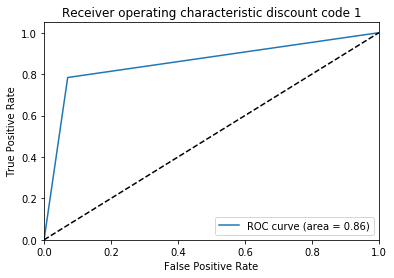

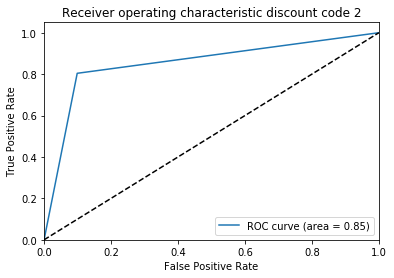

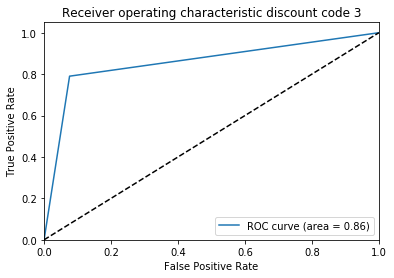

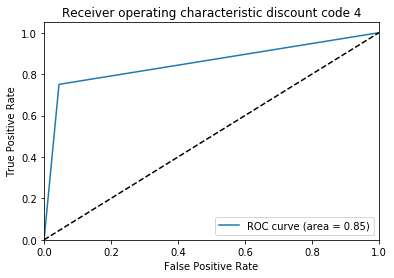

In [56]:
# Lets calculate the ROC for each discount code
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

exp = label_binarize(dtexpected.as_matrix(), classes=[1, 2, 3, 4])
pred = label_binarize(dtpredicted, classes=[1, 2, 3, 4])

n_classes = 4

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(exp[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic ' + 'discount code ' + str(i+1))
    plt.legend(loc="lower right")
    plt.show()

##### Naive Bayes

In [57]:
# Lets calculate the TP and FP for Naive Bayes
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(nbexpected, nbpredicted)

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

TPR = []
FNR = []
FPR = []
for i in range(4):
    TPR.insert(i, float(TP[i]) / (TP[i]+FN[i]))
    FNR.insert(i, float(FN[i]) / (TP[i]+FN[i]))
    FPR.insert(i, float(FP[i]) / (FP[i]+TN[i]))
    

print('False Negative')
print(FNR)
print('False Poisitive')
print(FPR)

False Negative
[0.6263641585295807, 0.8333534451550622, 0.9948313384113167, 0.4992894362861203]
False Poisitive
[0.36825940284980613, 0.15551839464882944, 0.0033893082729933755, 0.4613104455160819]


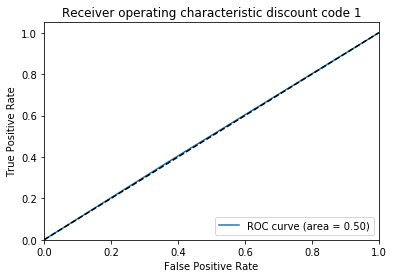

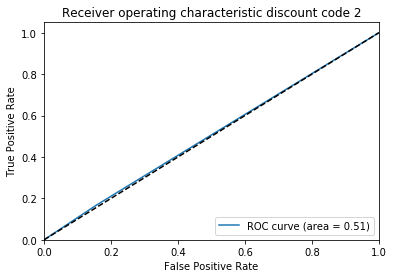

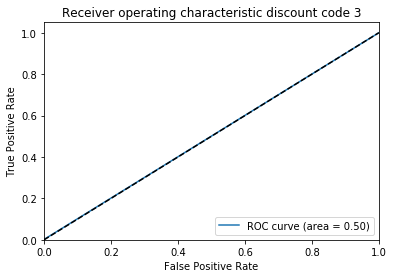

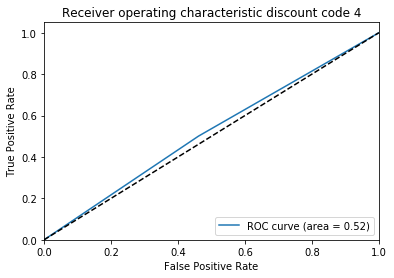

In [58]:
# Lets calculate the ROC for each discount code
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

exp = label_binarize(nbexpected.as_matrix(), classes=[1, 2, 3, 4])
pred = label_binarize(nbpredicted, classes=[1, 2, 3, 4])

n_classes = 4

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(exp[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic ' + 'discount code ' + str(i+1))
    plt.legend(loc="lower right")
    plt.show()

As we can clearly see, The Decision Tree Algorithem has much better results than the Naive Bayes Algorithem.
A high ROC Curve,
Low FN and FP Rates.

### End Of Excercise 2

# -------------------------------------------------------------------------------------------------------

### Excercise 3
We were asked to find clusters of hotels who have the same pricing policies over the monitored time.
To do that, we will need to do the following:
1. Gather information of the 150 most common hotels
2. Gather information of the 40 most common Checkin Dates
3. for every Checkin Date, Gather the price for each of the 4 discount codes
4. Normalize the prices
5. Execute a hierarchical clustering Algorithem and create a Dendrogram
6. Explain our results

# Let's Start

##### Let's find the 150 most common hotels in the file and then the 40 most common checkin dates

In [59]:
# loads origin csv data
hotels = pd.read_csv("hotels_data.csv")

# Group by hotel name
hotelgrouped = hotels.groupby(['Hotel Name'])

# Sort by count and take first 150
releHotels = hotelgrouped.agg(['count'])['Days'].sort_values(by=['count'], ascending=False)
releHotels = releHotels.head(150)

# Take only that hotels' data
hotels = hotels.loc[hotels['Hotel Name'].isin(releHotels.index)]

# Group by check in date
dateGrouped = hotels.groupby(['Checkin Date'])

# Sort by count and take first 40
releDates = dateGrouped.agg(['count'])['Days'].sort_values(by=['count'], ascending=False)
releDates = releDates.head(40)

# Take only that Checkin Date' data
hotels = hotels.loc[hotels['Checkin Date'].isin(releDates.index)]
hotelgrouped = hotels.groupby(['Hotel Name'])

##### Create a new dataframe that includes the following:
* each row is a Hotel
* each column is a combination of a date and a discount code
* the value within the cell is the normalized value of the price

In [60]:
# Get Dates as a list
dateslst = releDates.index.values

# Create a list of hotels that contains a list of discount codes across dates
tempLst = list(map(lambda date: list(map(lambda disCode: date + "-" + str(disCode),[1,2,3,4])),dateslst))

# Flatten the list
finalLst = [item for sublist in tempLst for item in sublist]

# Create a new dataframe
# it's columns - hotel name and the created list
clusterDf = pd.DataFrame(columns=['Hotel Name'] + finalLst)

hotelgrouped = hotels.groupby(['Hotel Name'])
hotelgrouped
# Go over every group of hotel
for htlName, htlGroup in hotelgrouped:
    # Create Current Hotel Row
    htlCurrRow = {'Hotel Name': htlName}
    
    # Group by Checkin Date
    currDateGrouped = htlGroup.groupby(['Checkin Date'])
    # Go over every Checkin Date in current hotel
    for chkName, chkGroup in currDateGrouped:
        # Group by Discount Code
        dCodeGrouped = htlGroup.groupby(['Discount Code'])
        
        # Go over every Discount Code in current Checkin Date
        for dCodeName, dCodeGroup in dCodeGrouped:
            
            # Get index of the minimun price for current parameters
            rowIdx = dCodeGroup['Discount Price'].idxmin(axis=1)
            
            # Extract the value
            lowPrice = dCodeGroup.loc[rowIdx]['Discount Price']
            
            # Set for current hotel,checkin and discount code value
            htlCurrRow[chkName + "-" + str(dCodeName)] = lowPrice
    
    # Add the created hotel row to the clustering dataframe
    clusterDf = clusterDf.append(htlCurrRow, ignore_index=True)

# Add missing values to a default -1
clusterDf = clusterDf.fillna(-1)
clusterDf

,Hotel Name,11/11/2015 0:00-1,11/11/2015 0:00-2,11/11/2015 0:00-3,11/11/2015 0:00-4,10/14/2015 0:00-1,10/14/2015 0:00-2,10/14/2015 0:00-3,10/14/2015 0:00-4,11/4/2015 0:00-1,...,11/3/2015 0:00-3,11/3/2015 0:00-4,8/13/2015 0:00-1,8/13/2015 0:00-2,8/13/2015 0:00-3,8/13/2015 0:00-4,11/25/2015 0:00-1,11/25/2015 0:00-2,11/25/2015 0:00-3,11/25/2015 0:00-4
0,Aloft Harlem,-1,-1,-1,-1,1065,1040,1043,988,1065,...,1043,988,-1,-1,-1,-1,-1,-1,-1,-1
1,Andaz 5th Avenue - a concept by Hyatt,1871,1502,1489,1339,1871,1502,1489,1339,1871,...,-1,-1,1871,1502,1489,1339,1871,1502,1489,1339
2,Andaz Wall Street - a concept by Hyatt,1013,995,975,1010,1013,995,975,1010,1013,...,975,1010,-1,-1,-1,-1,1013,995,975,1010
3,Baccarat Hotel and Residences New York,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,Bentley Hotel,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,868,1138,980,1179
5,Best Western Bayside Inn,-1,-1,-1,-1,677,694,636,-1,-1,...,-1,-1,-1,-1,-1,-1,677,694,636,-1
6,Best Western Bowery Hanbee Hotel,-1,-1,-1,-1,873,863,865,876,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,Best Western Plus Arena Hotel,-1,-1,-1,-1,872,677,1092,1120,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,Best Western Plus Newark Airport West,-1,-1,-1,-1,-1,-1,-1,-1,538,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,Blakely New York,-1,-1,-1,-1,1356,1265,1357,1357,-1,...,1357,1357,-1,-1,-1,-1,1356,1265,1357,1357


##### Now We would like to normalize the table from 1 to 100

In [2]:
releDates.index.values

NameError: name 'releDates' is not defined

In [61]:
import math

# Normalize according to the ratio of current price to max price
def normalize(maxi, mini, val):
    if (maxi == mini):
        return 100
    else:
        return (float(val - mini) / (maxi - mini)) * 100

# Create dataframe with no names for normalization 
clusterVals = clusterDf.drop('Hotel Name', axis=1)

# Go over rows and normalize each one:
for rowIdx, row in  clusterVals.iterrows():
    
    # Reset current maximum and minimum
    currMax = row.max()
    currMin = currMax
    
    # Go over every column and find minimum value
    for col in clusterVals:
        
        # Checks if current cell's value is different than -1 and smaller than current minimum value
        if row[col] != -1 and row[col] < currMin:
            currMin = row[col]
    
    # Normalize curr row cells
    clusterDf.iloc[rowIdx,1:161] = clusterDf.iloc[rowIdx,1:161].apply(lambda val: -1 if val == -1 else normalize(currMax, currMin, val))

clusterDf

,Hotel Name,11/11/2015 0:00-1,11/11/2015 0:00-2,11/11/2015 0:00-3,11/11/2015 0:00-4,10/14/2015 0:00-1,10/14/2015 0:00-2,10/14/2015 0:00-3,10/14/2015 0:00-4,11/4/2015 0:00-1,...,11/3/2015 0:00-3,11/3/2015 0:00-4,8/13/2015 0:00-1,8/13/2015 0:00-2,8/13/2015 0:00-3,8/13/2015 0:00-4,11/25/2015 0:00-1,11/25/2015 0:00-2,11/25/2015 0:00-3,11/25/2015 0:00-4
0,Aloft Harlem,-1.000000,-1.000000,-1.000000,-1.000000,100.000000,67.532468,71.428571,0.000000,100.000000,...,71.428571,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,Andaz 5th Avenue - a concept by Hyatt,100.000000,30.639098,28.195489,0.000000,100.000000,30.639098,28.195489,0.000000,100.000000,...,-1.000000,-1.000000,100.000000,30.639098,28.195489,0.000000,100.000000,30.639098,28.195489,0.000000
2,Andaz Wall Street - a concept by Hyatt,100.000000,52.631579,0.000000,92.105263,100.000000,52.631579,0.000000,92.105263,100.000000,...,0.000000,92.105263,-1.000000,-1.000000,-1.000000,-1.000000,100.000000,52.631579,0.000000,92.105263
3,Baccarat Hotel and Residences New York,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
4,Bentley Hotel,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,86.816720,36.012862,100.000000
5,Best Western Bayside Inn,-1.000000,-1.000000,-1.000000,-1.000000,70.689655,100.000000,0.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,70.689655,100.000000,0.000000,-1.000000
6,Best Western Bowery Hanbee Hotel,-1.000000,-1.000000,-1.000000,-1.000000,76.923077,0.000000,15.384615,100.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
7,Best Western Plus Arena Hotel,-1.000000,-1.000000,-1.000000,-1.000000,44.018059,0.000000,93.679458,100.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
8,Best Western Plus Newark Airport West,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,35.897436,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
9,Blakely New York,-1.000000,-1.000000,-1.000000,-1.000000,98.913043,0.000000,100.000000,100.000000,-1.000000,...,100.000000,100.000000,-1.000000,-1.000000,-1.000000,-1.000000,98.913043,0.000000,100.000000,100.000000


##### Now we will display a Dendrogram according to the given data

Populating the interactive namespace from numpy and matplotlib


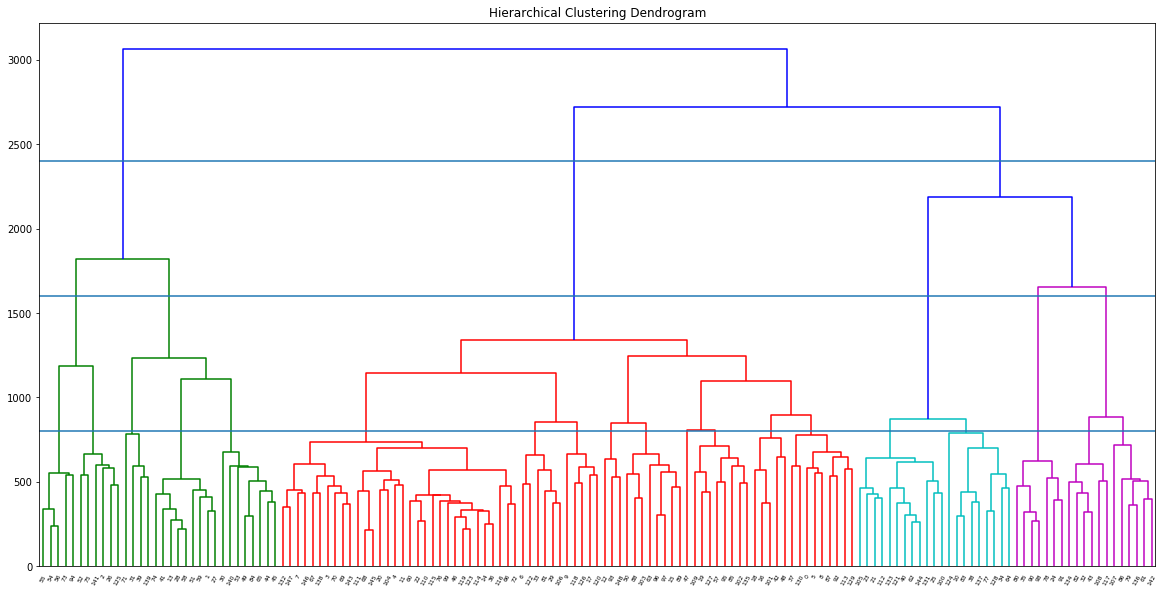

In [63]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

clusterVals = clusterDf.drop('Hotel Name', axis=1)
linkage_matrix = linkage(clusterVals, 'ward')
dendrogram(
    linkage_matrix,
    truncate_mode="lastp",  # show only the last p merged clusters
    p=149,  # show only the last p merged clusters
    show_leaf_counts=True,  # numbers in brackets are counts, others idx
    leaf_rotation=60.,
    leaf_font_size=6.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram')
plt.axhline(y=2400)
plt.axhline(y=1600)
plt.axhline(y=800)
plt.show()

#### Conclusions from our Dendrogram

As we can see, we have 4 main clusters, each one has many similatities between them.

* Many of the green cluster's hotels are Hilton hotels
* In the red cluster you have many CourtYard and Hampton hotels - could be because it is the biggest group - it also had a very large variance in data.
* Most of the purple clusters hotels have at least 4 stars in them (excluding 3 hotels out of 19 hotels in general)

In general, you could use this information to compare different hotels' pricing conventions.
for example - 
If you would like to go on a vacation on specific date, but the discounted price is too high, you could follow this algorithem and find out which other hotel has the same pricing convention but at a lower cost (since the data has been normalized)ץ

### End of Excercise 3

# -------------------------------------------------------------------------------------------------------

### Excercise 4
We were asked to implement one of the previous excercises (2 or 3) in pySpark and MLLib.
We have chosen to implement excercise 2

# Let's Start

In [1]:
import findspark as fds
fds.init()

from pyspark.sql import SparkSession

# Starts new spark session
spark = SparkSession.builder.appName("DS_Final_Project").getOrCreate()

ModuleNotFoundError: No module named 'findspark'

In [2]:
# Loads the data csv
hotels = spark.read.csv('Hotels_data_Changed.csv',inferSchema=True,header=True)
hotels.printSchema()

NameError: name 'spark' is not defined

In [3]:
# convert 'DayDiff' column to integer values
from pyspark.sql.functions import datediff
hotels = hotels.withColumn("DayDiff",datediff(hotels['Checkin Date'], hotels['Snapshot Date']))

from pyspark.sql.functions import row_number, col
from pyspark.sql.window import Window

# Creates action  to partition the data by given columns and order them by best percenage
win = Window.partitionBy('Snapshot Date', 'Checkin Date', 'DayDiff', 'Hotel Name', 'WeekDay').orderBy(col("DiscountPerc").desc())

# Takes the best discount code from every partition
spclassDf = hotels.withColumn("rn", row_number().over(win)).where(col("rn") == 1).select('Snapshot Date', 'Checkin Date', 'DayDiff', 'Hotel Name', 'WeekDay', 'Discount Code')

# Saving given Data to csv
spclassDf.coalesce(1).write.csv('Spark_Classification_Data', header=True)# Loading the data from csv
spClassDf = spark.read.csv('Spark_Classification_Data',inferSchema=True,header=True)

# Loading the data from csv
spClassDf = spark.read.csv('Spark_Classification_Data',inferSchema=True,header=True)
spClassDf.printSchema()

ModuleNotFoundError: No module named 'pyspark'

#### Running classification Algorithems on the given data

##### Let's convert non numeric data to numeric data for algorithem

In [4]:
spClassDf.show(1)

from pyspark.sql.functions import udf,unix_timestamp
from pyspark.sql.types import IntegerType

def dayTable(x):
    return {
        'Sunday': 1,
        'Monday': 2,
        'Tuesday': 3,
        'Wednesday': 4,
        'Thursday': 5,
        'Friday': 6,
        'Saturday': 7
    }[x]

dayTable_udf = udf(dayTable, IntegerType())

spClassDf = spClassDf.withColumn('Snapshot Date', unix_timestamp(col('Snapshot Date'))). \
        withColumn('Checkin Date', unix_timestamp(col('Checkin Date'))). \
        withColumn('WeekDay', dayTable_udf(col('WeekDay')))

# Now we will convert the hotels name column
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Hotel Name", outputCol="Hotel Name_idx")
indexed = indexer.fit(spClassDf).transform(spClassDf)
indexed.head(5)

NameError: name 'spClassDf' is not defined

##### Preparing data for MLLIB Structure

In [5]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

vAssembler = VectorAssembler(
  inputCols=['Snapshot Date',
             'Checkin Date',
             'Hotel Name_idx',
             'DayDiff',
             'WeekDay'],
    outputCol="features")

vector = vAssembler.transform(indexed)
structured = vector.select("features", "Discount Code")

# splitting data to test and train
train_data,test_data = structured.randomSplit([0.75,0.25])

ModuleNotFoundError: No module named 'pyspark'

##### Decision Tree

In [6]:
from pyspark.ml.classification import DecisionTreeClassifier

# Creating the trainer and setting it's parameters
decTree = DecisionTreeClassifier(labelCol="Discount Code", featuresCol="features", maxBins=554, maxDepth=30)

# Trains the model
dtmodel = decTree.fit(train_data)

# Select example rows to display
dtpredictions = dtmodel.transform(test_data)
dtpredictions.show()

ModuleNotFoundError: No module named 'pyspark'

In [7]:
# Compute And present accuracy
dtevaluator = MulticlassClassificationEvaluator(labelCol="Discount Code", predictionCol="prediction",
                                              metricName="accuracy")
accuracy = dtevaluator.evaluate(dtpredictions)
print("Decision Tree test set accuracy = " + str(accuracy))

NameError: name 'MulticlassClassificationEvaluator' is not defined

##### Naive Bayes

In [8]:
from pyspark.ml.classification import NaiveBayes

# Creates the trainer and set its parameters
navBay = NaiveBayes(modelType="multinomial", labelCol="Discount Code")

# Trains the model
nbmodel = navBay.fit(train_data)

# Select example rows to display
nbpredictions = nbmodel.transform(test_data)
nbpredictions.show()

ModuleNotFoundError: No module named 'pyspark'

In [9]:
# Computes accuracy on the test set
nbevaluator = MulticlassClassificationEvaluator(labelCol="Discount Code", predictionCol="prediction",
                                              metricName="accuracy")
accuracy = nbevaluator.evaluate(nbpredictions)
print("Naive bayes test set accuracy = " + str(accuracy))

NameError: name 'MulticlassClassificationEvaluator' is not defined

#### Results
* The results we got were no different than the results we got in excercise 2.
* Further reading on the subject could be given in that excercise

#### Parameter Influcence

In [10]:
# Getting Data from DT Classifier
# ['Snapshot Date', 'Checkin Date', 'Hotel Name', 'DayDiff', 'WeekDay']
dtmodel.featureImportances

NameError: name 'dtmodel' is not defined

As we can see these are the same results from excercise 2 again
* most influential was the hotel name
* followed by the snapshot date
* Checkin date
* DayDiff
* WeekDay

#### Statisitical Measurements
* True Positive
* False Positive
* ROC Curve

In [11]:
# Let's Calculate TP and FP
from pyspark.mllib.evaluation import MulticlassMetrics

decTree = dtpredictions.rdd.map(lambda x: (x["prediction"], float(x["Discount Code"])))
navBay = nbpredictions.rdd.map(lambda x: (x["prediction"], float(x["Discount Code"])))

metricsDT = MulticlassMetrics(decTree)
metricsNB = MulticlassMetrics(navBay)

print('True Positive - Decision Tree')
print(metricsDT.truePositiveRate(1.0),metricsDT.truePositiveRate(2.0),metricsDT.truePositiveRate(3.0),metricsDT.truePositiveRate(4.0))
print('True Positive - Naive Bayes')
print(metricsNB.truePositiveRate(1.0),metricsNB.truePositiveRate(2.0),metricsNB.truePositiveRate(3.0),metricsNB.truePositiveRate(4.0))
print('False Poisitive - Decision Tree')
print(metricsDT.falsePositiveRate(1.0),metricsDT.falsePositiveRate(2.0),metricsDT.falsePositiveRate(3.0),metricsDT.falsePositiveRate(4.0))
print('False Poisitive - Naive Bayes')
print(metricsNB.falsePositiveRate(1.0),metricsNB.falsePositiveRate(2.0),metricsNB.falsePositiveRate(3.0),metricsNB.falsePositiveRate(4.0))

ModuleNotFoundError: No module named 'pyspark'

In [12]:
# Let's Calculate ROC Curve

from pyspark.mllib.evaluation import BinaryClassificationMetrics

def makeBinary(predAndLabel, index):
    
    first = 0.0
    second = 0.0
    if predAndLabel[0] == index:
        first = 1.0
    if predAndLabel[1] == index:
        second = 1.0
    return (first, second)

for index in range(1,5):
    
    currPredAndLabDT = decTree.map(lambda x: makeBinary(x, index))
    currPredAndLabNB = navBay.map(lambda x: makeBinary(x, index))

    # Instantiate metrics object
    metricsDT = BinaryClassificationMetrics(currPredAndLabDT)
    metricsNB = BinaryClassificationMetrics(currPredAndLabNB)

    # ROC
    print("ROC Curve - Decision Tree - Discount code " + str(index) + " is " + str(metricsDT.areaUnderROC))
    print("ROC Curve - Naive Bayes - Discount code " + str(index) + " is " + str(metricsNB.areaUnderROC))

ModuleNotFoundError: No module named 'pyspark'

##### Meaning of these measurements have been discussed in excercise 2 - further reading there

### End Of Excercise